## Flight Price Prediction

In [2]:
!pip install matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
test_df = pd.read_excel('Data_Train.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df = pd.concat([train_df, test_df]) 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21366 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          21366 non-null  object
 1   Date_of_Journey  21366 non-null  object
 2   Source           21366 non-null  object
 3   Destination      21366 non-null  object
 4   Route            21364 non-null  object
 5   Dep_Time         21366 non-null  object
 6   Arrival_Time     21366 non-null  object
 7   Duration         21366 non-null  object
 8   Total_Stops      21364 non-null  object
 9   Additional_Info  21366 non-null  object
 10  Price            21366 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 2.0+ MB


In [13]:
df.describe()

,Price
count,21366.000000
mean,9087.064121
std,4611.251247
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
df.shape

(21366, 11)

In [15]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 21366, dtype: object

In [24]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['month'] = df['Date_of_Journey'].str.split('/').str[1]
df['year'] = df['Date_of_Journey'].str.split('/').str[2]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21366 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          21366 non-null  object
 1   Date_of_Journey  21366 non-null  object
 2   Source           21366 non-null  object
 3   Destination      21366 non-null  object
 4   Route            21364 non-null  object
 5   Dep_Time         21366 non-null  object
 6   Arrival_Time     21366 non-null  object
 7   Duration         21366 non-null  object
 8   Total_Stops      21364 non-null  object
 9   Additional_Info  21366 non-null  object
 10  Price            21366 non-null  int64 
 11  Date             21366 non-null  object
 12  month            21366 non-null  object
 13  year             21366 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.9+ MB


In [26]:
df['Date'] = df['Date'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21366 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          21366 non-null  object
 1   Date_of_Journey  21366 non-null  object
 2   Source           21366 non-null  object
 3   Destination      21366 non-null  object
 4   Route            21364 non-null  object
 5   Dep_Time         21366 non-null  object
 6   Arrival_Time     21366 non-null  object
 7   Duration         21366 non-null  object
 8   Total_Stops      21364 non-null  object
 9   Additional_Info  21366 non-null  object
 10  Price            21366 non-null  int64 
 11  Date             21366 non-null  int32 
 12  month            21366 non-null  int32 
 13  year             21366 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 2.7+ MB


In [28]:
df.drop(['Date_of_Journey'] , axis= 1, inplace=True)

In [29]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [32]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_minite'] = df['Dep_Time'].str.split(':').str[1]
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_minite'] = df['Dep_minite'].astype(int)

In [33]:
df.drop(['Dep_Time'] , axis=1 , inplace= True)

In [34]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_hour,Dep_minite
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [40]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_minite'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_minite'] = df['Arrival_minite'].astype(int)
df.drop(['Arrival_Time' , 'Route'] , axis= 1 , inplace=True)

In [41]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,month,year,Dep_hour,Dep_minite,Arrival_hour,Arrival_minite
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [47]:
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_minite'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]
# df['Duration_hour'] = df['Duration_hour'].astype(int)
# df['Duration_minite'] = df['Duration_minite'].astype(int)
df.drop(['Duration'] , axis= 1 , inplace= True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21366 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          21366 non-null  object
 1   Source           21366 non-null  object
 2   Destination      21366 non-null  object
 3   Total_Stops      21364 non-null  object
 4   Additional_Info  21366 non-null  object
 5   Price            21366 non-null  int64 
 6   Date             21366 non-null  int32 
 7   month            21366 non-null  int32 
 8   year             21366 non-null  int32 
 9   Dep_hour         21366 non-null  int32 
 10  Dep_minite       21366 non-null  int32 
 11  Arrival_hour     21366 non-null  int32 
 12  Arrival_minite   21366 non-null  int32 
 13  Duration_hour    21366 non-null  object
 14  Duration_minite  19302 non-null  object
dtypes: int32(7), int64(1), object(7)
memory usage: 2.5+ MB


In [49]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Dep_hour,Dep_minite,Arrival_hour,Arrival_minite,Duration_hour,Duration_minite
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [50]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           2
Additional_Info       0
Price                 0
Date                  0
month                 0
year                  0
Dep_hour              0
Dep_minite            0
Arrival_hour          0
Arrival_minite        0
Duration_hour         0
Duration_minite    2064
dtype: int64

In [51]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [52]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Dep_hour,Dep_minite,Arrival_hour,Arrival_minite,Duration_hour,Duration_minite
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,5,2019,9,45,9,25,23,40
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,5,2019,9,45,9,25,23,40


In [53]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop' : 0 , '1 stop' : 1 ,'2 stops' : 2 , '3 stops' : 3 , '4 stops' : 4 , 'nan' : 1})

In [54]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Dep_hour,Dep_minite,Arrival_hour,Arrival_minite,Duration_hour,Duration_minite
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,16,50,21,35,4,45


In [55]:
df['Duration_hour'] = df['Duration_hour'].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [56]:
df[df['Duration_hour'] =='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Dep_hour,Dep_minite,Arrival_hour,Arrival_minite,Duration_hour,Duration_minite
6474,Air India,Mumbai,Hyderabad,2.0,No info,17327,6,3,2019,16,50,16,55,5m,NaN
6474,Air India,Mumbai,Hyderabad,2.0,No info,17327,6,3,2019,16,50,16,55,5m,NaN


In [57]:
df.drop(2019 , axis=0 , inplace=True)

In [58]:
df[df['Duration_hour'] =='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Dep_hour,Dep_minite,Arrival_hour,Arrival_minite,Duration_hour,Duration_minite
6474,Air India,Mumbai,Hyderabad,2.0,No info,17327,6,3,2019,16,50,16,55,5m,NaN
6474,Air India,Mumbai,Hyderabad,2.0,No info,17327,6,3,2019,16,50,16,55,5m,NaN


In [59]:
df.drop(6474 , axis=0 , inplace=True)

In [60]:
df[df['Duration_hour'] =='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Dep_hour,Dep_minite,Arrival_hour,Arrival_minite,Duration_hour,Duration_minite


In [62]:
df['Duration_hour'] = df['Duration_hour'].astype(int)

In [63]:
df['Duration_minite'] = df['Duration_minite'].astype(int)

ValueError: cannot convert float NaN to integer

In [64]:
df['Duration_minite'] = df['Duration_minite'].fillna(0).astype(int)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21362 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          21362 non-null  object 
 1   Source           21362 non-null  object 
 2   Destination      21362 non-null  object 
 3   Total_Stops      21360 non-null  float64
 4   Additional_Info  21362 non-null  object 
 5   Price            21362 non-null  int64  
 6   Date             21362 non-null  int32  
 7   month            21362 non-null  int32  
 8   year             21362 non-null  int32  
 9   Dep_hour         21362 non-null  int32  
 10  Dep_minite       21362 non-null  int32  
 11  Arrival_hour     21362 non-null  int32  
 12  Arrival_minite   21362 non-null  int32  
 13  Duration_hour    21362 non-null  int32  
 14  Duration_minite  21362 non-null  int32  
dtypes: float64(1), int32(9), int64(1), object(4)
memory usage: 1.9+ MB


In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [68]:
df['Airline'] = encoder.fit_transform(df['Airline'])
df['Source'] = encoder.fit_transform(df['Source'])
df['Destination'] = encoder.fit_transform(df['Destination'])
df['Additional_Info'] = encoder.fit_transform(df['Additional_Info'])

In [69]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,Dep_hour,Dep_minite,Arrival_hour,Arrival_minite,Duration_hour,Duration_minite
0,3,0,5,0.0,8,3897,24,3,2019,22,20,1,10,2,50
1,1,3,0,2.0,8,7662,1,5,2019,5,50,13,15,7,25
2,4,2,1,2.0,8,13882,9,6,2019,9,25,4,25,19,0
3,3,3,0,1.0,8,6218,12,5,2019,18,5,23,30,5,25
4,3,0,5,1.0,8,13302,1,3,2019,16,50,21,35,4,45


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21362 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          21362 non-null  int64  
 1   Source           21362 non-null  int32  
 2   Destination      21362 non-null  int32  
 3   Total_Stops      21360 non-null  float64
 4   Additional_Info  21362 non-null  int32  
 5   Price            21362 non-null  int64  
 6   Date             21362 non-null  int32  
 7   month            21362 non-null  int32  
 8   year             21362 non-null  int32  
 9   Dep_hour         21362 non-null  int32  
 10  Dep_minite       21362 non-null  int32  
 11  Arrival_hour     21362 non-null  int32  
 12  Arrival_minite   21362 non-null  int32  
 13  Duration_hour    21362 non-null  int32  
 14  Duration_minite  21362 non-null  int32  
dtypes: float64(1), int32(12), int64(2)
memory usage: 1.6 MB


In [71]:
df.shape

(21362, 15)

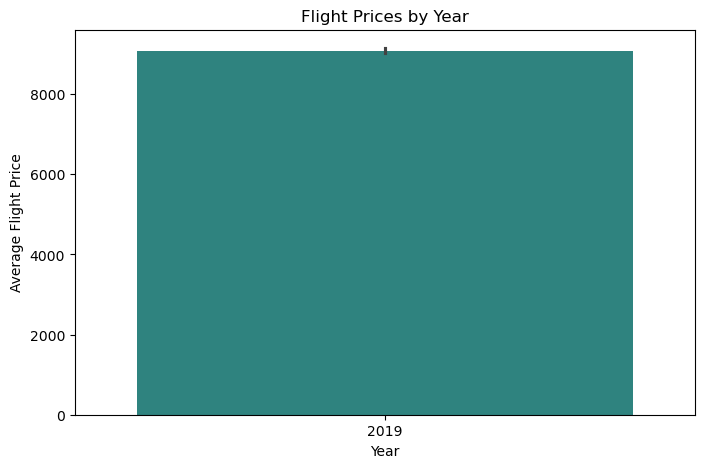

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x='year', y='Price', data=df, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Average Flight Price")
plt.title("Flight Prices by Year")
plt.show()


<Axes: xlabel='Airline', ylabel='Price'>

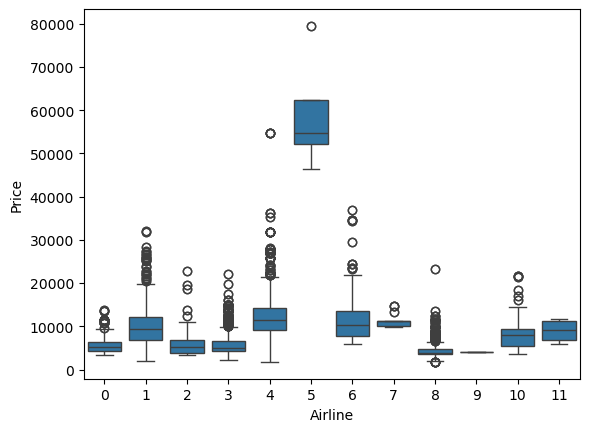

In [77]:
sns.boxplot(data=df , x='Airline' , y='Price')

<Axes: xlabel='Source', ylabel='Price'>

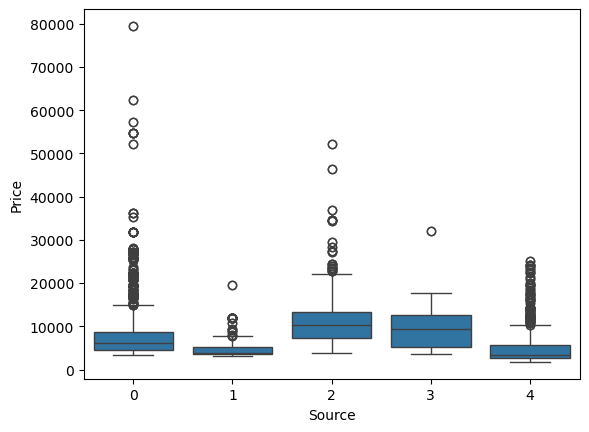

In [78]:
sns.boxplot(data=df , x='Source' , y='Price')

<Axes: xlabel='Destination', ylabel='Price'>

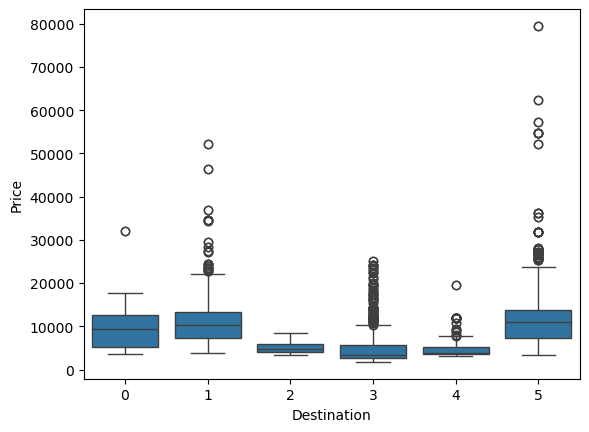

In [79]:
sns.boxplot(data=df , x='Destination' , y='Price')

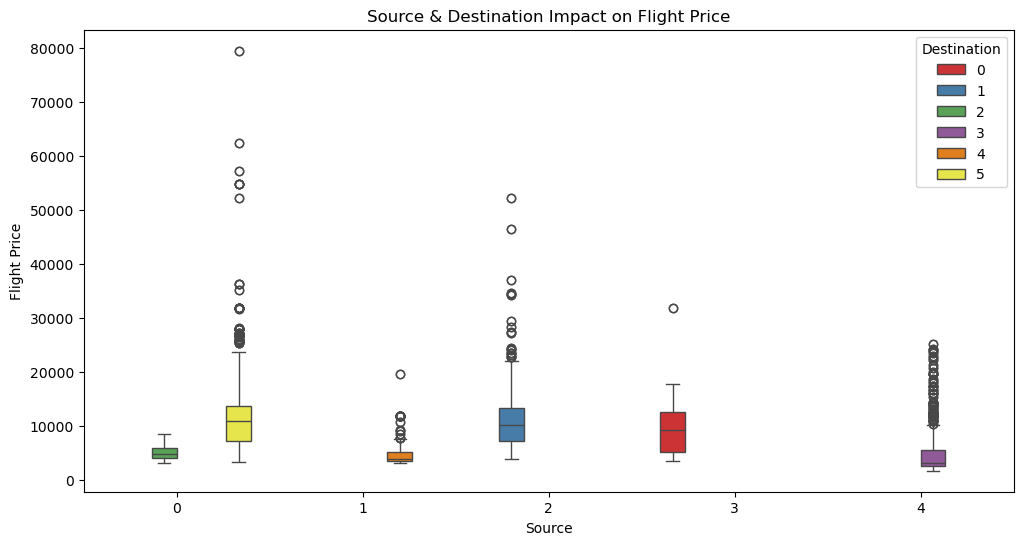

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Source', y='Price', hue='Destination', data=df, palette='Set1')
plt.xlabel("Source")
plt.ylabel("Flight Price")
plt.title("Source & Destination Impact on Flight Price")
plt.legend(title="Destination")
plt.show()


<Axes: xlabel='month', ylabel='Price'>

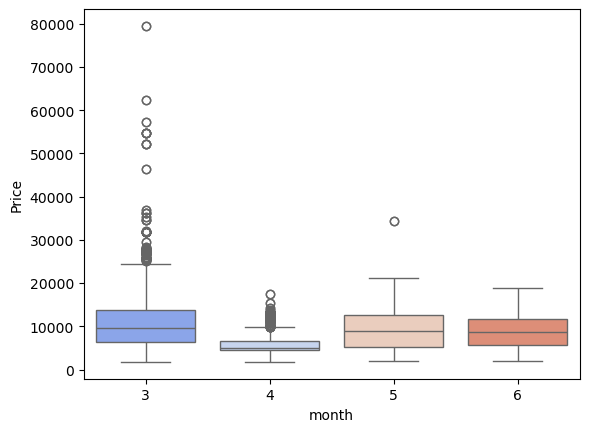

In [81]:
sns.boxplot(data=df , x='month' , y='Price' , palette='coolwarm')